Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **5. studenog 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

1.0


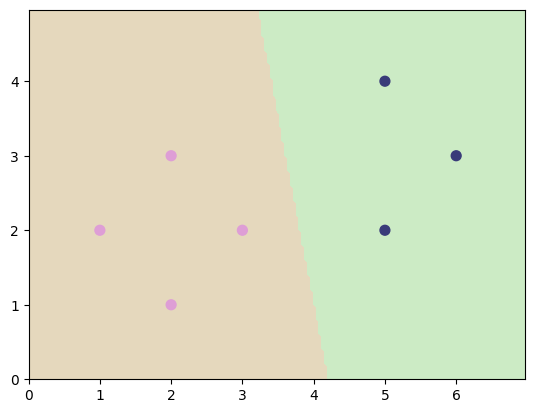

In [5]:
clf = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lambda x: clf.predict(x) >= 0.5)
print(accuracy_score(seven_y, clf.predict(seven_X)))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

1.0


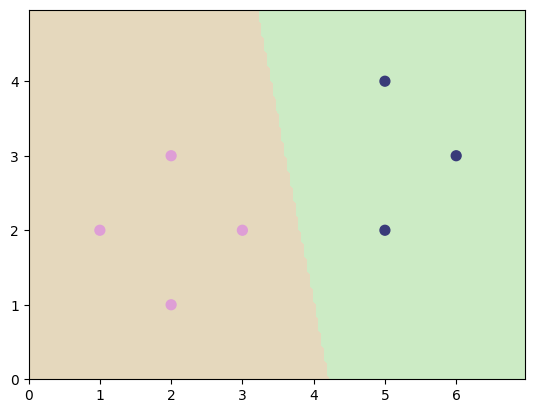

In [6]:
reg = LinearRegression().fit(seven_X, seven_y)
classificationTest = lambda x: reg.predict(x) >= 0.5
plot_2d_clf_problem(seven_X, seven_y, classificationTest)

classification = []
for predictedY in reg.predict(seven_X):
    if(predictedY >= 0.5):
        classification.append(1)
    else:
        classification.append(0)

print(accuracy_score(seven_y, classification))

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)


0.875


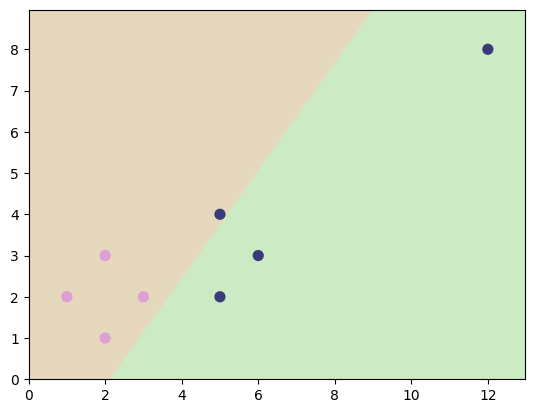

In [8]:
clf = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: clf.predict(x) >= 0.5)
print(accuracy_score(outlier_y, clf.predict(outlier_X)))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

0.875


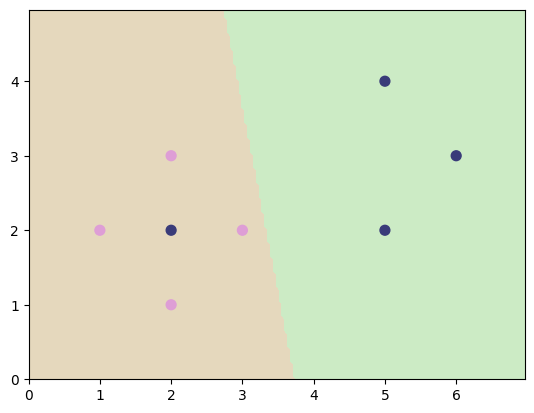

In [10]:
clf = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
plot_2d_clf_problem(unsep_X, unsep_y, lambda x: clf.predict(x) >= 0.5)
print(accuracy_score(unsep_y, clf.predict(unsep_X)))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

[2 1 2 2 2 1 0 1 0 0 1 0 1 2 0 0 0 2 0 1 1 2 1 0 1 2 0 2 2 2 2 1 1 1 1 0 2
 0 2 2 2 1 2 1 1 1 1 1 0 2 0 1 0 1 0 0 2 0 0 1 0 0 1 2 1 0 2 0 1 2 2 1 1 0
 0 0 2 2 0 0 1 0 2 2 1 1 0 2 2 1 1 2 2 0 0 0 2 1 0 2]


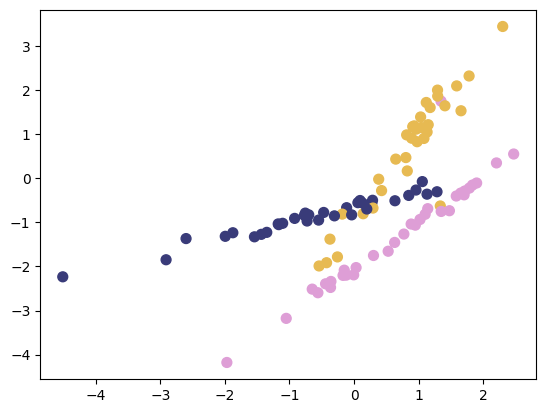

In [11]:
from sklearn.datasets import make_classification

dataset = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
X = dataset[0]
real_y = dataset[1]
print(real_y)

plot_2d_clf_problem(X, real_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

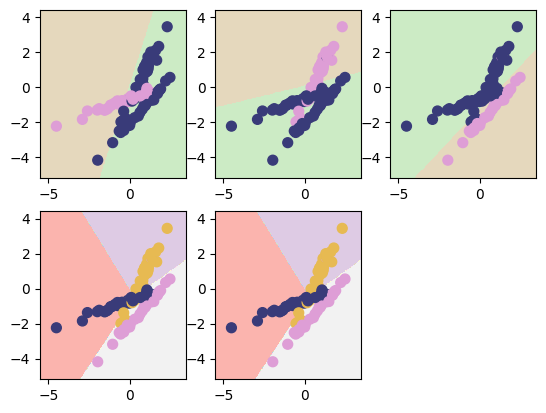

In [12]:
#h1 služi za klasificiranje samo primjera koji imaju oznaku 0, analogno vrijedi za ostale h-ove
def getClassification(model, X):
    classification = []
    for predictedY in model.predict(X):
        if(predictedY >= 0.5):
            classification.append(1)
        else:
            classification.append(0)
    return classification

h1Y, h2Y, h3Y = [], [], []
for y in real_y:
    if y == 0:
        h1Y.append(1)
        h2Y.append(0)
        h3Y.append(0)
    elif y == 1:
        h1Y.append(0)
        h2Y.append(1)
        h3Y.append(0)
    elif y == 2:
        h1Y.append(0)
        h2Y.append(0)
        h3Y.append(1)

model1 = LinearRegression().fit(X, h1Y)
model2 = LinearRegression().fit(X, h2Y)
model3 = LinearRegression().fit(X, h3Y)

predictedYs1 = getClassification(model1, X)
predictedYs2 = getClassification(model2, X)
predictedYs3 = getClassification(model3, X)

subplot(2,3,1)
plot_2d_clf_problem(X, h1Y, lambda x: model1.predict(x) >= 0.5)
subplot(2,3,2)
plot_2d_clf_problem(X, h2Y, lambda x: model2.predict(x) >= 0.5)
subplot(2,3,3)
plot_2d_clf_problem(X, h3Y, lambda x: model3.predict(x) >= 0.5)

def predict(x):
    predictionsMax = np.array([])
    predictions1 = model1.predict(x)
    predictions2 = model2.predict(x)
    predictions3 = model3.predict(x)

    for index in range(len(predictions1)):
        tempArray = [predictions1[index], predictions2[index], predictions3[index]]
        predictionsMax = np.append(predictionsMax, tempArray.index(max(tempArray)))
    
    return predictionsMax

subplot(2, 3, 4)
plot_2d_clf_problem(X, real_y, predict)

#RidgeClassifier
clf = RidgeClassifier(alpha=0).fit(X, real_y)
subplot(2, 3, 5)
plot_2d_clf_problem(X, real_y, lambda x: clf.predict(x))



### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

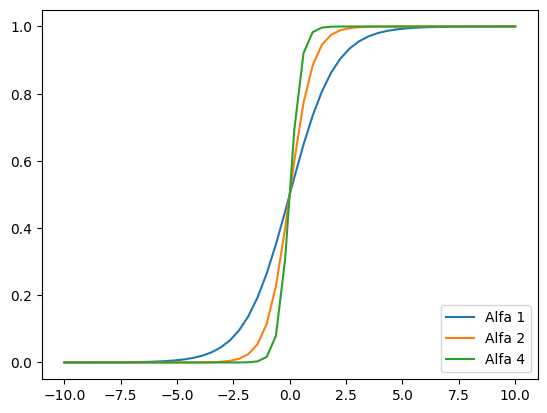

In [13]:
import math
def sigm(x, a):
    return 1/(1+math.exp(-a*x))

x_array = linspace(-10, 10)

y1, y2, y3 = [], [], []

for x in x_array:
    y1.append(sigm(x, 1))
    y2.append(sigm(x, 2))
    y3.append(sigm(x, 4))

plot(x_array, y1, label='Alfa 1')
plot(x_array, y2, label='Alfa 2')
plot(x_array, y3, label='Alfa 4')
legend(loc='lower right')      

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [14]:
from numpy import linalg
from sklearn.preprocessing import add_dummy_feature
import math
import copy

def lr_h(x, w):
    #proširit sa dummy jedinicama
    x = np.insert(x, 0, 1)
    return sigm(np.dot(np.transpose(w), x), 1)

def cross_entropy_error(X, y, w, alpha):
    error = 0
    for j in range(len(X)):
        prediction = lr_h(X[j], w)
        error += -y[j]*math.log(prediction)-(1-y[j])*math.log(1-prediction)
    return 1/(len(X))*(error + (alpha/2)*np.dot(np.transpose(w[1:]), w[1:]))
       

def lr_train(X, y, eta = 0.01, max_iter = 2000, alpha = 0, epsilon = 0.0001, trace= False):
    w = np.zeros(len(X[0])+1)
    wTrace = []
    errorLast = 0
    for i in range(0, max_iter):
        deltaw0 = 0
        deltaw = np.zeros(len(X[0]))
        
        for j in range(0, len(X)):
            prediction = lr_h(X[j], w)
            deltaw0 = deltaw0 - prediction + y[j]
            deltaw = deltaw - (prediction - y[j])*X[j]
            
        w[0] = w[0] + eta*deltaw0
        for j in range(1, len(w)):
            w[j] = w[j]*(1-eta*alpha) + eta*deltaw[j-1]
        
        wTrace.append(copy.copy(w))
        errorNew = cross_entropy_error(X, y, w, alpha)
        if(abs(errorNew - errorLast) < epsilon):
            break;
        errorLast = errorNew
    if trace:
        return w, wTrace
    else: return w  


### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [15]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

[ 4.45449454 -1.71089242  0.68413507]
0.13521872720206743


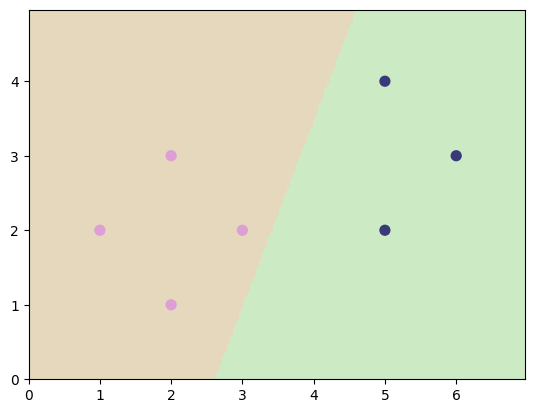

In [16]:
w = lr_train(seven_X, seven_y)

print(w)
print(cross_entropy_error(seven_X, seven_y, w, 0))
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w) >= 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

2000


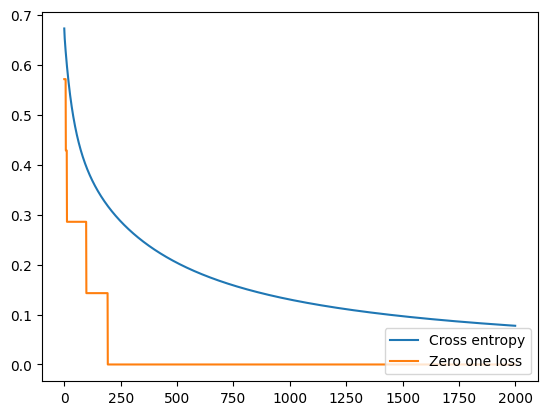

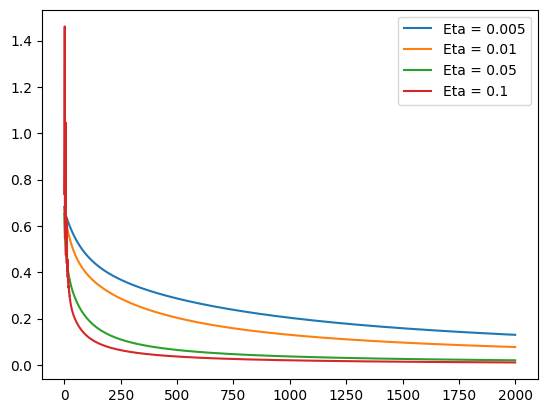

In [17]:
from sklearn.metrics import zero_one_loss
etas = [0.005, 0.01, 0.05, 0.1]

iterations = np.arange(0, 2000)

w, wtrace = lr_train(seven_X, seven_y, trace=True, epsilon=0)
print(len(wtrace))
crossEntropy = []
zerooneloss = []
for weight in wtrace:
    crossEntropy.append(cross_entropy_error(seven_X, seven_y, weight, 0))
    predictedYs = []
    for x in seven_X:
        if(lr_h(x, weight) >= 0.5):
            predictedYs.append(1)
        else:predictedYs.append(0)
    zerooneloss.append(zero_one_loss(seven_y, predictedYs))
plot(iterations, crossEntropy, label="Cross entropy")
plot(iterations, zerooneloss, label="Zero one loss")
legend(loc="lower right")
figure()
crossEntropy = [[], [], [], []]
for i in range(0, 4):
    w, wTrace = lr_train(seven_X, seven_y, eta=etas[i], trace=True, epsilon=0)
    for weight in wTrace:
        crossEntropy[i].append(cross_entropy_error(seven_X, seven_y, weight, 0))
plot(iterations, crossEntropy[0], label='Eta = 0.005')    
plot(iterations, crossEntropy[1], label='Eta = 0.01')
plot(iterations, crossEntropy[2], label='Eta = 0.05')
plot(iterations, crossEntropy[3], label='Eta = 0.1')  
legend(loc="upper right")  

In [18]:
# Vaš kôd ovdje


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

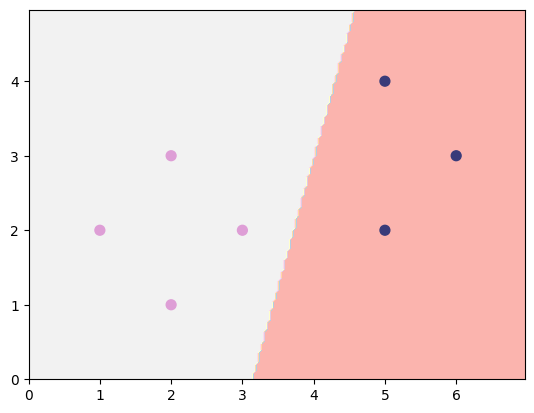

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000, tol=0.0001, C=1000000).fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, lambda x: model.predict(x))

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [20]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

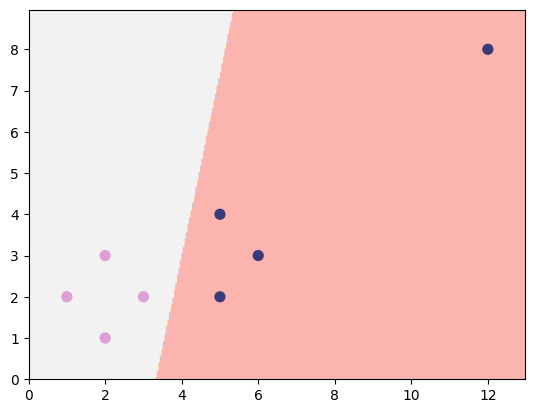

In [21]:
model = LogisticRegression(max_iter=2000, tol=0.0001, C=1000000).fit(outlier_X, outlier_y)

plot_2d_clf_problem(outlier_X, outlier_y, lambda x: model.predict(x))

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

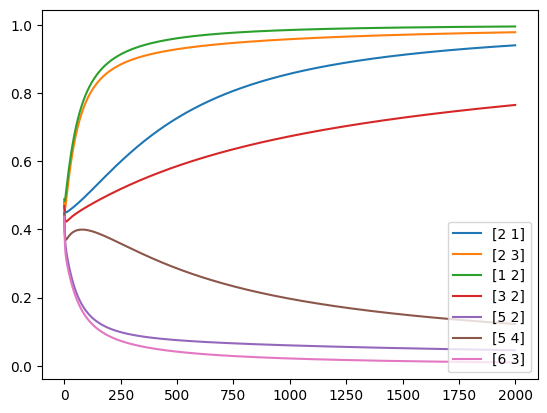

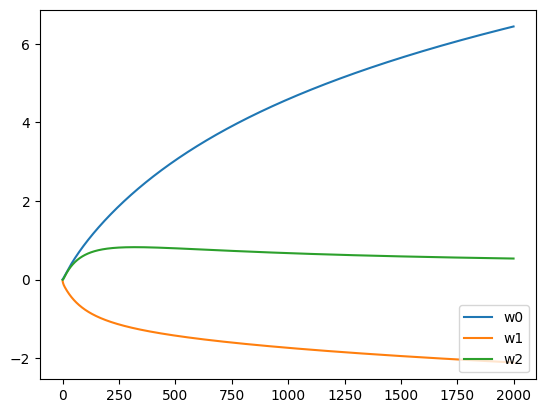

In [22]:
w, wTrace = lr_train(seven_X, seven_y, trace=True, epsilon=0)
predictedValues = [[],[],[],[],[],[],[]]

for i in range(0, 2000):
    for j in range(0, len(seven_X)):
        y = lr_h(seven_X[j], wTrace[i])
        predictedValues[j].append(y)
iterations = np.arange(0, 2000)

for i in range(0, len(seven_X)):
    plot(iterations, predictedValues[i], label=seven_X[i])
legend(loc='lower right')

figure()
plot(iterations,  np.array([row[0] for row in wTrace]), label='w0')
plot(iterations,  np.array([row[1] for row in wTrace]), label='w1')
plot(iterations,  np.array([row[2] for row in wTrace]), label='w2')
legend(loc='lower right')

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [23]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

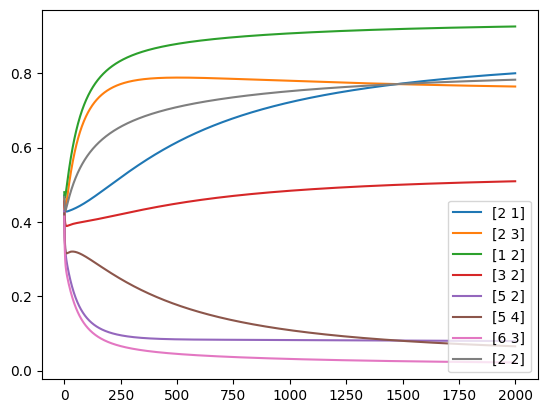

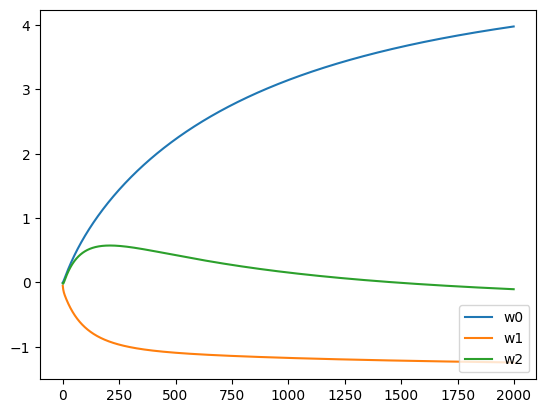

In [24]:
w, wTrace = lr_train(unsep_X, unsep_y, trace=True, epsilon=0)
predictedValues = [[],[],[],[],[],[],[],[]]

for i in range(0, 2000):
    for j in range(0, len(unsep_X)):
        y = lr_h(unsep_X[j], wTrace[i])
        predictedValues[j].append(y)
iterations = np.arange(0, 2000)

for i in range(0, len(unsep_X)):
    plot(iterations, predictedValues[i], label=unsep_X[i])
legend(loc='lower right')

figure()
plot(iterations,  np.array([row[0] for row in wTrace]), label='w0')
plot(iterations,  np.array([row[1] for row in wTrace]), label='w1')
plot(iterations,  np.array([row[2] for row in wTrace]), label='w2')
legend(loc='lower right')

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [25]:
from numpy.linalg import norm

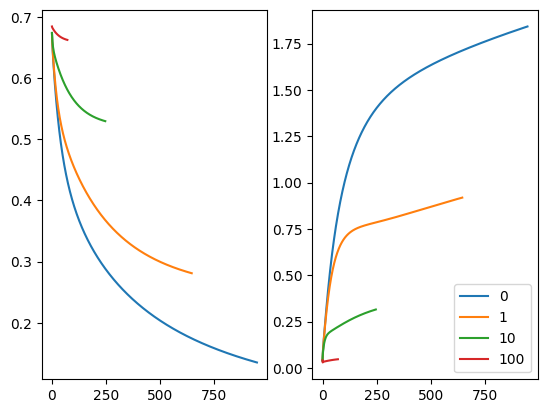

In [26]:
alphas = [0, 1, 10, 100]

for alpha in alphas:
    w, wTrace = lr_train(seven_X, seven_y, trace=True, alpha=alpha)
    crossEntropy = []
    norms = []
    for weight in wTrace:
        crossEntropy.append(cross_entropy_error(seven_X, seven_y, weight, alpha))
        norms.append(norm(weight[1:], ord=2))
    subplot(1, 2, 1)
    plot(np.arange(0, len(crossEntropy)), crossEntropy, label=alpha)  
    subplot(1, 2, 2)
    plot(np.arange(0, len(norms)), norms, label = alpha)
legend(loc = 'lower right')

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [27]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))
a1 = np.array([-3.183, 1.933])
a2 = np.array([-3.183, 1.933])
result1 = a1[:, np.newaxis] * a2

b1 = np.array([4.017, -2.067])
b2 = np.array([4.017, -2.067])
result2 = b1[:, np.newaxis] * b2 

c1 = np.array([3.317, -2.467])
c2 = np.array([3.317, -2.467])
result3 = c1[:, np.newaxis] * c2 

d1 = np.array([1.017, -0.067])
d2 = np.array([1.017, -0.067])
result4 = d1[:, np.newaxis] * d2 

e1 = np.array([-3.283, 0.733])
e2 = np.array([-3.283, 0.733])
result5 = e1[:, np.newaxis] * e2 

f1 = np.array([-1.883, 1.933])
f2 = np.array([-1.883, 1.933])
result6 = f1[:, np.newaxis] * f2 

print(1/6*(result1+result2+result3+result4+result5+result6))


[[ 8.771389   -4.79222233]
 [-4.79222233  3.06222233]]


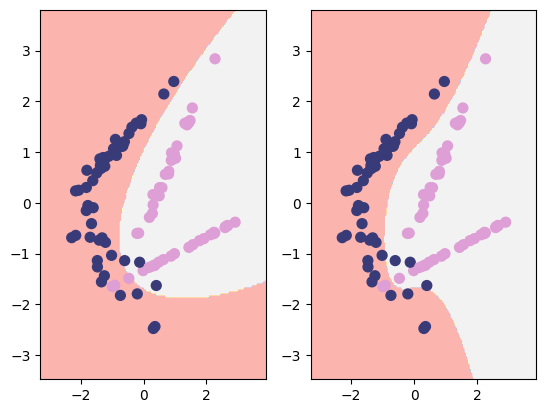

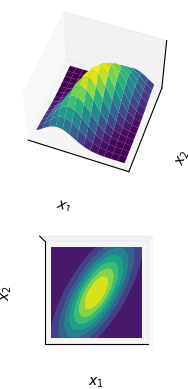

In [33]:
from sklearn.datasets import make_classification
dataset = make_classification(n_features=2,n_redundant=0, n_clusters_per_class=2)
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)

model1 = LogisticRegression().fit(poly2.fit_transform(dataset[0]), dataset[1])
model2 = LogisticRegression().fit(poly3.fit_transform(dataset[0]), dataset[1])
subplot(1, 2, 1)
plot_2d_clf_problem(dataset[0], dataset[1], lambda x : model1.predict(poly2.transform(x)))
subplot(1, 2, 2)
plot_2d_clf_problem(dataset[0], dataset[1], lambda x : model2.predict(poly3.transform(x)))



import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1 , 1], [1,  2]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?